In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

### Data Set Characteristics:

##### Number of Instances:
 	
20640

##### Number of Attributes:
 	
8 numeric, predictive attributes and the target

##### Attribute Information:
 	
* MedInc median income in block
* HouseAge median house age in block
* AveRooms average number of rooms
* AveBedrms average number of bedrooms
* Population block population
* AveOccup average house occupancy
* Latitude house block latitude
* Longitude house block longitude

#### Target

The target variable is the median house value in units of 100,000 for California districts.

#### Objective
Predict the house price using 8 predictor variables

#### Documentation 
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#examples-using-sklearn-datasets-fetch-california-housing

In [4]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [11]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Housing.data => Independent Data

Housing.target => Dependent Data

In [13]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# Scaler is trained on training data only because we do not want information from test set or validation set to influence model training

In [15]:
np.random.seed(42)
tf.random.set_seed(42)

In [16]:
X_train.shape, X_valid.shape, X_test.shape

((11610, 8), (3870, 8), (5160, 8))

In [17]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=[8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

# Below code can also be used
# keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss="mean_squared_error", 
              optimizer=keras.optimizers.SGD(1e-3), 
              metrics=['mae'])

# loss - mean_squared_error - since it is a regression problem
# metrics - mean absolute error - since it is a regression problem

In [25]:
model_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3949 - mae: 0.4489 - val_loss: 0.3695 - val_mae: 0.4322
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3922 - mae: 0.4469 - val_loss: 0.3698 - val_mae: 0.4350
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3898 - mae: 0.4461 - val_loss: 0.3647 - val_mae: 0.4285
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3873 - mae: 0.4439 - val_loss: 0.3632 - val_mae: 0.4309
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3851 - mae: 0.4426 - val_loss: 0.3607 - val_mae: 0.4276
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3829 - mae: 0.4415 - val_loss: 0.3586 - val_mae: 0.4247
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3808 - mae: 0.4398 - val_loss: 0.3563 - val_mae: 0.4240
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.

In [26]:
mae_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 1s 3ms/step - loss: 0.3596 - mae: 0.4269


In [27]:
model_history.history

{'loss': [0.3948921859264374,
  0.3922426700592041,
  0.38980168104171753,
  0.3872992694377899,
  0.3851175904273987,
  0.3828713893890381,
  0.3807542622089386,
  0.3787873089313507,
  0.37684252858161926,
  0.37485167384147644,
  0.3732492923736572,
  0.37154120206832886,
  0.3699616491794586,
  0.36844807863235474,
  0.3671078085899353,
  0.36586400866508484,
  0.36476749181747437,
  0.36347663402557373,
  0.36217090487480164,
  0.36128589510917664],
 'mae': [0.448872447013855,
  0.4469223618507385,
  0.4460664689540863,
  0.4439034163951874,
  0.4425695538520813,
  0.4414599537849426,
  0.4398252069950104,
  0.43846991658210754,
  0.43753179907798767,
  0.4359448254108429,
  0.43472519516944885,
  0.43356847763061523,
  0.4326536953449249,
  0.43151575326919556,
  0.4306667149066925,
  0.43046441674232483,
  0.4293926954269409,
  0.4283789396286011,
  0.4272266924381256,
  0.4268842041492462],
 'val_loss': [0.3695237636566162,
  0.3698018789291382,
  0.364663690328598,
  0.3632129

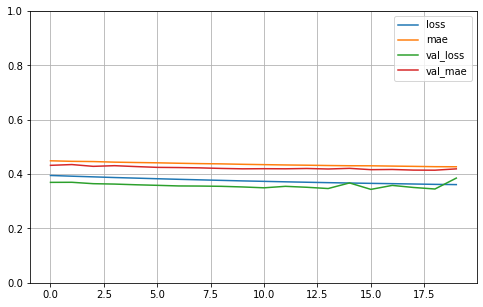

In [28]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

### Predicting the value using the model

In [29]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
print (y_pred)
print(y_test[:3])

[[0.60718817]
 [1.8601768 ]
 [3.7925074 ]]
[0.477   0.458   5.00001]


In [30]:
del model

In [31]:
keras.backend.clear_session()

## Functional API
Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.


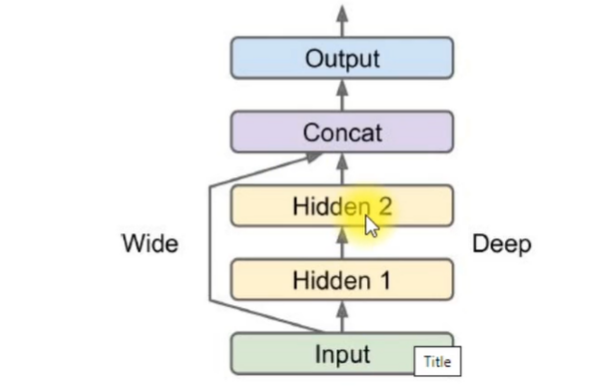

* This kind of wide linkage cannot be created in Sequential API
* With help of the functional API, neural network can learn from both deep(complex) and wide(simple) patterns.

In [32]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [33]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

In [34]:
model.compile(loss="mean_squared_error", 
              optimizer=keras.optimizers.SGD(1e-3), 
              metrics=['mae'])

In [35]:
model_history = model.fit(X_train, y_train, epochs=80, validation_data=(X_valid, y_valid))

Epoch 1/80
363/363 [==============================] - 2s 3ms/step - loss: 1.6920 - mae: 0.8893 - val_loss: 0.8798 - val_mae: 0.6026
Epoch 2/80
363/363 [==============================] - 1s 2ms/step - loss: 0.6836 - mae: 0.5994 - val_loss: 0.6420 - val_mae: 0.5764
Epoch 3/80
363/363 [==============================] - 1s 2ms/step - loss: 0.6265 - mae: 0.5775 - val_loss: 0.5891 - val_mae: 0.5503
Epoch 4/80
363/363 [==============================] - 1s 2ms/step - loss: 0.5877 - mae: 0.5581 - val_loss: 0.5455 - val_mae: 0.5343
Epoch 5/80
363/363 [==============================] - 1s 2ms/step - loss: 0.5566 - mae: 0.5421 - val_loss: 0.5409 - val_mae: 0.5202
Epoch 6/80
363/363 [==============================] - 1s 2ms/step - loss: 0.5312 - mae: 0.5298 - val_loss: 0.4903 - val_mae: 0.5046
Epoch 7/80
363/363 [==============================] - 1s 2ms/step - loss: 0.5108 - mae: 0.5186 - val_loss: 0.4728 - val_mae: 0.4962
Epoch 8/80
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [36]:
mae_test = model.evaluate(X_test, y_test)


162/162 [==============================] - 0s 2ms/step - loss: 0.3452 - mae: 0.4147


In [38]:
model_history.history

{'loss': [1.6920058727264404,
  0.6836402416229248,
  0.6264882683753967,
  0.5877465605735779,
  0.5565560460090637,
  0.5311980843544006,
  0.5107864141464233,
  0.4951668083667755,
  0.48022276163101196,
  0.4684668779373169,
  0.4589638411998749,
  0.45022058486938477,
  0.4432658851146698,
  0.43632543087005615,
  0.43062451481819153,
  0.4253447949886322,
  0.42129331827163696,
  0.4168177843093872,
  0.4126453101634979,
  0.40958571434020996,
  0.4059634208679199,
  0.40294399857521057,
  0.40004560351371765,
  0.3971884846687317,
  0.39462149143218994,
  0.3924905061721802,
  0.39049339294433594,
  0.3884531259536743,
  0.38671207427978516,
  0.3848456144332886,
  0.3829538822174072,
  0.3815852701663971,
  0.3805288076400757,
  0.37870272994041443,
  0.3775632083415985,
  0.37630152702331543,
  0.37508344650268555,
  0.37408941984176636,
  0.3728184998035431,
  0.37164586782455444,
  0.3710441291332245,
  0.3702850043773651,
  0.3690377175807953,
  0.3680500090122223,
  0.3677

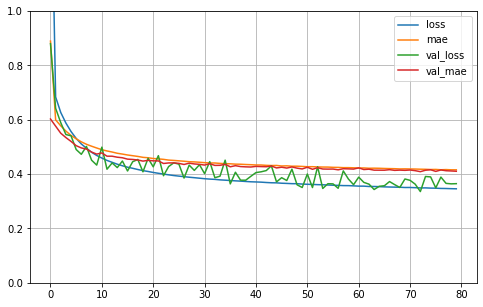

In [39]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

### Saving and Restoring

In [40]:
model.save("SELFfunctionalAPI.h5")

In [41]:
%pwd

'C:\\Users\\kolik\\Deep Learning\\Mod2 Artificial Neural Networks'

In [47]:
del model

In [48]:
keras.backend.clear_session()

In [44]:
model = keras.models.load_model("SELFfunctionalAPI.h5")

In [45]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

In [46]:
y_pred = model.predict(X_new)
print(y_pred)

[[0.7181244]
 [1.6816441]
 [4.1709065]]


* Model can be saved only after complete training.
* But there can be models which take 8 to 10 hours to train. In this case Callbacks allow you to save a model while training after each epoch.

## Using Callbacks during Training

In [49]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [50]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [51]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(1e-3))

In [52]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Model-{epoch:02d}.h5")

In [53]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 1s 1ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4474 - val_loss: 0.4379

In [54]:
del model
keras.backend.clear_session()

__Best Model Only__

In [55]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [56]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(1e-3))

In [57]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Best_Model.h5", save_best_only=True)

In [58]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.8542 - val_loss: 1.3779
Epoch 2/10
363/363 [==============================] - 1s 1ms/step - loss: 0.7854 - val_loss: 0.6885
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6817 - val_loss: 0.6645
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6283 - val_loss: 0.5944
Epoch 5/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5868 - val_loss: 0.5505
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5510 - val_loss: 0.5211
Epoch 7/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5225 - val_loss: 0.5055
Epoch 8/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4993 - val_loss: 0.4648
Epoch 9/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4803 - val_loss: 0.4442
Epoch 10/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4649 - val_loss: 0.4304

In [59]:
model = keras.models.load_model("Best_Model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 954us/step - loss: 0.4472


### Best Model Only - Early Stopping

* Run the model for large epoch value
* Val accuracy is checked at each epoch. 
* After certain epochs if the val accuracy is not improving then the training is stopped at that point and the model with best validation score will be used.
* This is best case scenario.

In [60]:
del model
keras.backend.clear_session()

In [61]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
]) 

In [63]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(1e-3))

In [64]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("early_stop_model.h5", save_best_only=True)

In [67]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

# patience: Number of epochs with no improvement after which training will be stopped.
# if after 53 epochs the performance measure is not increasing then keras will check untill +10 i.e 63 and then stop training

In [68]:
history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/200
363/363 [==============================] - 1s 2ms/step - loss: 2.0148 - val_loss: 1.4007
Epoch 2/200
363/363 [==============================] - 1s 1ms/step - loss: 0.7735 - val_loss: 1.3632
Epoch 3/200
363/363 [==============================] - 1s 1ms/step - loss: 0.6815 - val_loss: 0.8402
Epoch 4/200
363/363 [==============================] - 0s 1ms/step - loss: 0.6134 - val_loss: 0.5897
Epoch 5/200
363/363 [==============================] - 1s 1ms/step - loss: 0.5652 - val_loss: 0.5373
Epoch 6/200
363/363 [==============================] - 0s 1ms/step - loss: 0.5242 - val_loss: 0.5175
Epoch 7/200
363/363 [==============================] - 1s 1ms/step - loss: 0.4955 - val_loss: 0.4717
Epoch 8/200
363/363 [==============================] - 1s 1ms/step - loss: 0.4729 - val_loss: 0.4582
Epoch 9/200
363/363 [==============================] - 1s 1ms/step - loss: 0.4546 - val_loss: 0.4201
Epoch 10/200
363/363 [==============================] - 1s 1ms/step - loss: 0.4411 - val_lo

In [69]:
model = keras.models.load_model("early_stop_model.h5")
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 903us/step - loss: 0.3888
